In [1]:
import numpy as np      
import matplotlib.pyplot as plt     
from mpl_toolkits.mplot3d import Axes3D    
import pandas as pd     
from sklearn import datasets

In [2]:
data = pd.read_csv('iris.csv')
label_dict = {'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}  
data["variety"] = data["variety"].replace(label_dict)
X = data[["sepal.length", "sepal.width", "petal.length", "petal.width"]]
Y = data["variety"]
print(X.shape)      # 150 rows (datapoints), 4 columns (features)
print(Y.shape)      # 150 single dimension labels
X.head()

(150, 4)
(150,)


,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
def standardise(x):
    x_std = np.array(x - np.mean(x, axis=0))      # subtract the mean
    x_std = np.divide(x_std, np.std(x_std, axis=0))     # divide each feature by the range of that feature (-1 < x < 1)
    return x_std   

In [4]:
X_std = standardise(X)    # centre data around mean and divide by range/s.d
X_std

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [5]:
def decompose(x):
    cov = np.matmul(x.T, x)    
    print('\nCovariance matrix')
    print(cov)
    eig_vals, eig_vecs = np.linalg.eig(cov)     # find the eigenvalues and eigenvectors of the covariance matrix
    print('\nEigenvectors')
    print(eig_vecs)
    print('\nEigenvalues')
    print(eig_vals)
    return eig_vals, eig_vecs, cov
X_std = np.array(X_std)
eig_vals, eig_vecs, covariance = decompose(X_std)      # compute the covariance matrix and find its characteristics


Covariance matrix
[[150.         -17.63546762 130.76306638 122.69116894]
 [-17.63546762 150.         -64.26601565 -54.91888988]
 [130.76306638 -64.26601565 150.         144.42981471]
 [122.69116894 -54.91888988 144.42981471 150.        ]]

Eigenvectors
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]

Eigenvalues
[437.77467248 137.10457072  22.01353134   3.10722546]


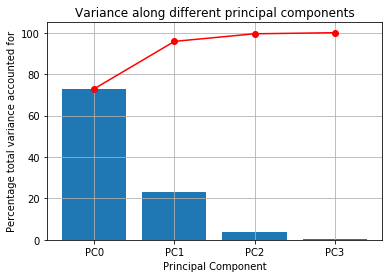

In [6]:
def whicheigs(eig_vals):  
    total = sum(eig_vals)   
    var_percent = [(i/total) * 100 for i in eig_vals]   
    cum_var_percent = np.cumsum(var_percent)    
    fig = plt.figure()      
    ax =  fig.add_subplot(111)      
    plt.title('Variance along different principal components')
    ax.grid()
    plt.xlabel('Principal Component')
    plt.ylabel('Percentage total variance accounted for')
    ax.plot(cum_var_percent, '-ro')    
    ax.bar(range(len(eig_vals)), var_percent) 
    plt.xticks(np.arange(len(eig_vals)), ('PC{}'.format(i) for i in range(len(eig_vals))))  
    plt.show()  # show us the figure
whicheigs(eig_vals)     

In [7]:
def reduce(x, eig_vecs, dims):  
    W = eig_vecs[:, :dims]
    print('\nDimension reducing matrix')
    print(W)
    return np.matmul(x, W), W
dim = 2
X_reduced, transform = reduce(X_std, eig_vecs, dim)     # transform our data into a lower dimension
print(X_reduced.shape)
print(transform.shape)


Dimension reducing matrix
[[ 0.52106591 -0.37741762]
 [-0.26934744 -0.92329566]
 [ 0.5804131  -0.02449161]
 [ 0.56485654 -0.06694199]]
(150, 2)
(4, 2)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


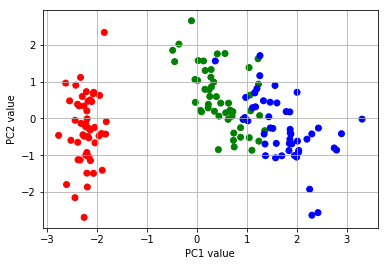

In [8]:
colour_dict = {0:'r', 1:'g', 2:'b'}     # map labels to colours for plotting
colour_list = [colour_dict[i] for i in list(Y)]     # generator to give list of colours corresponding to each class
def plotreduced(x, dim):
    """Plot the data which has been transformed to a visualisable dimension"""
    fig = plt.figure()      # make a figure
    plt.grid()
    if dim == 3:
        ax = fig.add_subplot(111, projection='3d')      # add a 3d set of axes
        ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=colour_list)    # scatter plot our 3d data
        plt.xlabel('PC1 value')
        plt.ylabel('PC2 value')
        ax.set_zlabel('PC3 value')
    elif dim == 2:
        ax = fig.add_subplot(111)      # add a 2d set of axes
        ax.scatter(x[:, 0], x[:, 1], c=colour_list)    # scatter plot our 3d data
        plt.xlabel('PC1 value')
        plt.ylabel('PC2 value')
    elif dim == 1:
        ax = fig.add_subplot(111)       # add a 2d axis
        ax.scatter(x, np.zeros_like(x), c=colour_list)      # plot the 1D data along the x axis (zero for each y value)
        plt.xlabel('PC1 Value')
    plt.show()
    return ax

ax = plotreduced(X_reduced, dim)      # check out how the data looks in a visualisable dimension

In [9]:
from sklearn.model_selection import train_test_split
  
X_train, X_test, y_train, y_test = train_test_split(X_reduced, Y, test_size = 0.2, random_state = 0)

In [10]:
from sklearn.linear_model import LogisticRegression  
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y_test, y_pred)

In [13]:
cm

array([[11,  0,  0],
       [ 0,  8,  5],
       [ 0,  0,  6]], dtype=int64)

In [14]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [15]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       1.00      0.62      0.76        13
          2       0.55      1.00      0.71         6

avg / total       0.91      0.83      0.84        30

